In [67]:
import loadData
import numpy as np
import matplotlib.pyplot as plt
import glob

plt.rcParams['figure.figsize'] = [15, 10]

In [2]:
#Enter path to data folder:
data_root = '/NMA/Mapping Brain Networks/data/allData'

#Get list of files in glob
session_paths = glob.glob(data_root + '/*')

#Groupings of brain regions
regions = ["vis ctx", "thal", "hipp", "other ctx", "midbrain",  "basal ganglia", "subplate"]
brain_groups = [["VISa", "VISam", "VISl", "VISp", "VISpm", "VISrl"], # visual cortex
                ["CL", "LD", "LGd", "LH", "LP", "MD", "MG", "PO", "POL", "PT", "RT", "SPF", "TH", "VAL", "VPL", "VPM"], # thalamus
                ["CA", "CA1", "CA2", "CA3", "DG", "SUB", "POST"], # hippocampal
                ["ACA", "AUD", "COA", "DP", "ILA", "MOp", "MOs", "OLF", "ORB", "ORBm", "PIR", "PL", "SSp", "SSs", "RSP"," TT"], # non-visual cortex
                ["APN", "IC", "MB", "MRN", "NB", "PAG", "RN", "SCs", "SCm", "SCig", "SCsg", "ZI"], # midbrain
                ["ACB", "CP", "GPe", "LS", "LSc", "LSr", "MS", "OT", "SNr", "SI"], # basal ganglia 
                ["BLA", "BMA", "EP", "EPd", "MEA"] # cortical subplate
               ]

#Define sessions to load
sessions = [11,12] #Pick which sessions to load.

#Load sessions
dat = {}
for session in sessions:
    dat[session] = {}
    path = session_paths[session]
    
    session_date, mouse_name = loadData.get_session_info(data_root, path)
    good_clusters, cluster_locations = loadData.get_cluster_info(path)
    cluster_spikes = loadData.get_cluster_spikes(path)
    trial_intervals, visualStim_times, goCue_times, response_times, feedback_times, feedback_type = loadData.get_trial_info(path) 
    
    dat[session]['session_date'] = session_date
    dat[session]['mouse_name'] = mouse_name
    dat[session]['good_clusters'] = good_clusters
    dat[session]['cluster_locations'] = cluster_locations
    dat[session]['cluster_spikes'] = cluster_spikes
    dat[session]['trial_intervals'] = trial_intervals
    dat[session]['visualStim_times'] = visualStim_times
    dat[session]['goCue_times'] = goCue_times
    dat[session]['response_times'] = response_times
    dat[session]['feedback_times'] = feedback_times
    dat[session]['feedback_type'] = feedback_type
    
    print('Data for session',session,'loaded.')

Data for session 11 loaded.
Data for session 12 loaded.


In [3]:
#We want to look at only one trial
tDat = dat[11]

In [4]:
#Lets have a look at the keys
print(tDat.keys())

dict_keys(['session_date', 'mouse_name', 'good_clusters', 'cluster_locations', 'cluster_spikes', 'trial_intervals', 'visualStim_times', 'goCue_times', 'response_times', 'feedback_times', 'feedback_type'])


In [72]:
#lets plot a raster plot
def plotRaster(channel_spikes, trial, intervals, visualStims, goCues, responses, feedbacks):
    '''
    This function plots a raster plot
    '''
    
    #Extract single trial from all data
    interval = intervals[trial,:].flatten()
    
    #Onset of visual stim -> t=0 for trial.
    visualStim = visualStims[trial]
    goCue = goCues[trial] - visualStim
    response = responses[trial] - visualStim
    feedback = feedbacks[trial] - visualStim
    
    #Define raster_spikes variable for plot
    raster_spikes = []
    for spikes in channel_spikes:
        trial_loc = np.where(np.logical_and(spikes>=interval[0], spikes<interval[1]))[0]
        raster_spikes.append(spikes[trial_loc])
    raster_spikes -=visualStim
    
    #plot the lines:
    plt.axvline(0,ls='--', color='y',label='visualStim')
    plt.axvline(goCue, ls='--', color='r',label='goCue')
    plt.axvline(response, ls='--', color='k', label='response')
    plt.axvline(feedback, ls='--', color='g', label='feedback')
    plt.eventplot(raster_spikes)
    plt.legend()
    plt.xlabel('Time (s)')
    plt.ylabel('Neuron no.')
    plt.title('Raster Plot for trial '+str(trial))
    plt.show()

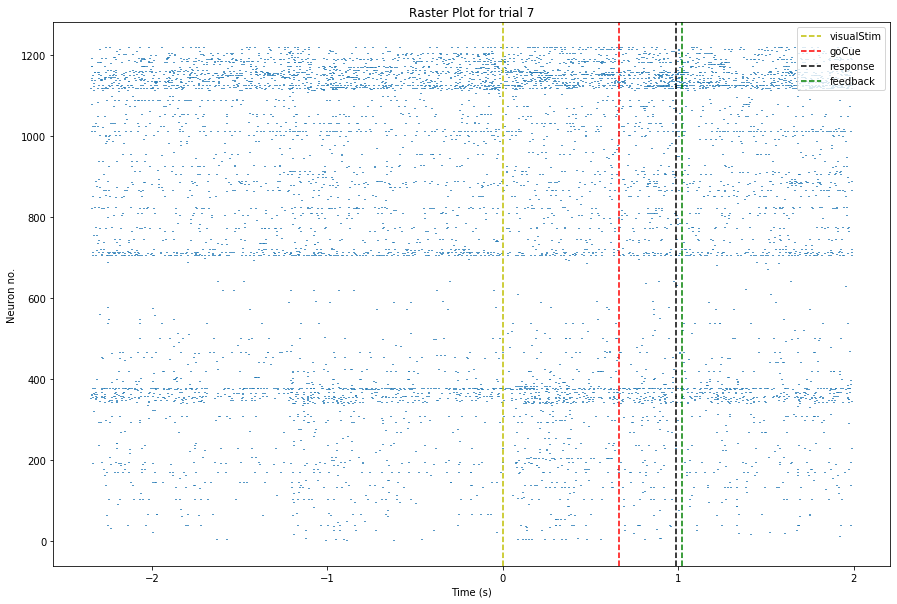

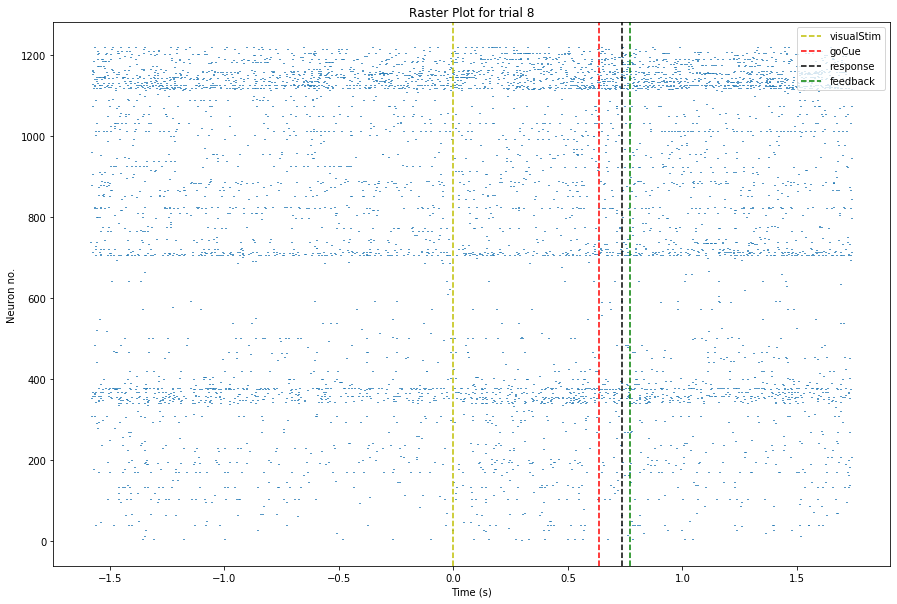

In [75]:
plotRaster(tDat['cluster_spikes'],7,tDat['trial_intervals'],tDat['visualStim_times'],tDat['goCue_times'],tDat['response_times'],tDat['feedback_times'])
plotRaster(tDat['cluster_spikes'],8,tDat['trial_intervals'],tDat['visualStim_times'],tDat['goCue_times'],tDat['response_times'],tDat['feedback_times'])

In [24]:
tDat['trial_intervals'][0,:]

array([63.62583906, 73.98820023])